In [1]:
import lucem_illud

In [2]:
import gensim
import pandas
import sklearn

In [3]:
import numpy as np

In [11]:
import pandas as pd

In [4]:
import spacy

In [6]:
nlp = spacy.load("en_core_web_sm")

In [7]:
# generally not good practice, as we want to see warnings - but in this case, there are no critical warnings
import warnings
warnings.filterwarnings('ignore')

1a) Assemble a text corpus (collection of documents) of at least a 1000 distinct documents. The more data you have, the more effective your models will be

I use sentimental twitter data that can be accessed from https://www.kaggle.com/code/manchunhui/us-presidential-election-sentiment-analysis/data

In [12]:
hashtag = pd.read_csv("hashtag_donaldtrump.csv",lineterminator='\n')

In [13]:
hashtag = hashtag.dropna()

In [15]:
hashtag_10000 = hashtag[:10000]

In [16]:
hashtag_10000

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
2,2020-10-15 00:00:02,1.316529e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,1185.0,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060
4,2020-10-15 00:00:08,1.316529e+18,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,4.741380e+07,Rana Abtar - رنا أبتر,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",...,5393.0,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,2020-10-21 00:00:01.492866121
11,2020-10-15 00:00:25,1.316529e+18,"In 2020, #NYPost is being #censorship #CENSORE...",0.0,0.0,Twitter for iPhone,1.994033e+07,Change Illinois | Biden will increase taxes by...,changeillinois,"Illinois, home of Lincoln and Reagan, used to ...",...,1396.0,"Chicago, Illinois",41.875562,-87.624421,Chicago,United States of America,North America,Illinois,IL,2020-10-21 00:00:04.105381834
12,2020-10-15 00:00:26,1.316529e+18,#Trump #PresidentTrump #Trump2020LandslideVict...,3.0,5.0,Twitter for Android,1.243315e+18,Ron Burgundy,Anchorman_USA,"I'm kind of a Big Deal, People know me! I driv...",...,496.0,"San Diego, CA",32.717421,-117.162771,San Diego,United States of America,North America,California,CA,2020-10-21 00:00:04.478598364
14,2020-10-15 00:00:31,1.316529e+18,@Susan_Hutch @JoeBiden #Ukraine @RealDonaldTru...,2.0,0.0,Twitter Web App,3.439562e+08,Sebastian White,SebWrites,"Tortured, literary genius, well probably the f...",...,2755.0,Edinburgh ~ Heart of Scotland!,55.953346,-3.188375,City of Edinburgh,United Kingdom,Europe,Scotland,SCT,2020-10-21 00:00:05.225031425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43719,2020-10-17 00:45:20,1.317265e+18,#armyfortrump #trump #BidenHarris2020ToSaveAme...,0.0,0.0,Twitter for Android,2.530282e+07,Olivia B. F.,chicksinger1963,"Guns, God & Country! \nChick singing, Billiard...",...,69.0,"St. Louis, Missouri",38.626418,-90.199838,St. Louis,United States of America,North America,Missouri,MO,2020-10-21 04:36:32.087291199
43722,2020-10-17 00:45:32,1.317265e+18,@realDonaldTrump Anti-Trump? PLEASE VOTE! #Mak...,2.0,0.0,Twitter for iPhone,7.827965e+17,THCPetDoctor,THCPetDoctor,"I represent a group of 220+ veterinarians, MDs...",...,88.0,"Berkeley, CA",37.870839,-122.272864,Berkeley,United States of America,North America,California,CA,2020-10-21 04:36:32.833724260
43729,2020-10-17 00:46:11,1.317266e+18,@realDonaldTrump Anti-Trump? PLEASE VOTE! #Mak...,0.0,0.0,Twitter for iPhone,7.827965e+17,THCPetDoctor,THCPetDoctor,"I represent a group of 220+ veterinarians, MDs...",...,88.0,"Berkeley, CA",37.870839,-122.272864,Berkeley,United States of America,North America,California,CA,2020-10-21 04:36:35.819456503
43730,2020-10-17 00:46:14,1.317266e+18,HE. ATE. THE. ONION!!!!!! I CAN'T! OH MY LORD ...,0.0,0.0,Twitter Web App,6.001351e+07,Pierre Ibrahim,PierreJIbrahim,I say stuff. I also sometimes do stuff.\n\nEgy...,...,243.0,"Houston, TX",29.758938,-95.367697,Houston,United States of America,North America,Texas,TX,2020-10-21 04:36:36.192673033


In [302]:
corpus = []
for index, row in hashtag_10000.iterrows():
    corpus.append(row["tweet"])

In [303]:
corpus

["#Trump: As a student I used to hear for years, for ten years, I heard China! In 2019! And we have 1.5 and they don't know how many we have and I asked them how many do we have and they said 'sir we don't know.' But we have millions. Like 300 million.\n\nUm. What?",
 'You get a tie! And you get a tie! #Trump ‘s rally #Iowa https://t.co/jJalUUmh5D',
 'In 2020, #NYPost is being #censorship #CENSORED by Twitter to manipulate a US election in favor of #JoeBiden and against #Trump.\n\nbut CCP from #China or porn on Twitter? \n\nThat’s always been fine for @jack @vijaya @dickc @KatieS.\n\n@marciadorsey is @jack sick?',
 '#Trump #PresidentTrump #Trump2020LandslideVictory #Trump2020 #MAGA #KAG #4MoreYears #America #AmericaFirst #AllLivesMatter #Winning #Vote #VoteInPerson #VoteTrump #VotePresidentTrump https://t.co/TzXBKOvgNs',
 '@Susan_Hutch @JoeBiden #Ukraine @RealDonaldTrump impeachment #FactCheck ‘how’ often #Trump &amp; @GOP lied!!!\n\nhttps://t.co/OFbVPBQs1s',
 '#Ukraine @RealDonaldTrum

In [304]:
len(corpus)

10000


1b) What do you hope to analyse using this corpus? How is it related to your social scientific research question?

I will use this textual data for classification tasks, sementic analysis and sentimental analysis
I want to see during US election 2020 period, how twitter user think about presidential candidates and their sentiment 

2a) Perform an exploratory data analysis on this collection of documents. Use any 2 of PCA/LSA, topic models, clustering, or visualisation techniques on your data for the exploration.

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline

In [20]:
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_texts = vectorizer.fit_transform(corpus).toarray()

In [21]:
len(tfidf_texts[0])

33561

In [22]:
tfidf_texts[0][0:100]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [23]:
svd = TruncatedSVD(5)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)

In [24]:
lsa_texts = lsa.fit_transform(tfidf_texts)

In [25]:
lsa_texts[0]

array([ 0.64134493, -0.52647897,  0.19720043, -0.51594816, -0.08003787])

In [26]:
from sklearn.decomposition import PCA

In [27]:
pca = PCA(n_components=5)

In [28]:
pca_texts = pca.fit_transform(tfidf_texts)

In [29]:
pca.explained_variance_

array([0.00844175, 0.00371337, 0.00350934, 0.0031455 , 0.00307023])

In [30]:
from gensim.models import LdaModel
from gensim.corpora import Dictionary

In [31]:
from gensim.parsing.preprocessing import preprocess_documents

In [32]:
preprocessed_texts = preprocess_documents(corpus)

In [33]:
dictionary = Dictionary(preprocessed_texts)
corpus = [dictionary.doc2bow(text) for text in preprocessed_texts]

In [36]:
ldamodel = LdaModel(corpus=corpus, num_topics=10, id2word=dictionary)

In [37]:
ldamodel.print_topics()

[(0,
  '0.028*"http" + 0.018*"realdonaldtrump" + 0.018*"donaldtrump" + 0.011*"trumpisapo" + 0.010*"trump" + 0.009*"winner" + 0.009*"trumpisanationaldisgrac" + 0.008*"uspoli" + 0.006*"barackobama" + 0.006*"monei"'),
 (1,
  '0.033*"http" + 0.031*"trump" + 0.014*"donaldtrump" + 0.010*"la" + 0.009*"que" + 0.007*"seen" + 0.006*"love" + 0.006*"deni" + 0.006*"del" + 0.005*"art"'),
 (2,
  '0.067*"trump" + 0.040*"http" + 0.012*"covid" + 0.009*"biden" + 0.008*"gop" + 0.007*"amp" + 0.007*"realdonaldtrump" + 0.007*"li" + 0.006*"million" + 0.006*"presid"'),
 (3,
  '0.085*"trump" + 0.078*"http" + 0.026*"biden" + 0.022*"elect" + 0.019*"vote" + 0.017*"donaldtrump" + 0.013*"realdonaldtrump" + 0.012*"joebiden" + 0.010*"covid" + 0.009*"presid"'),
 (4,
  '0.073*"trump" + 0.029*"http" + 0.014*"peopl" + 0.010*"biden" + 0.009*"like" + 0.008*"elect" + 0.008*"amp" + 0.008*"vote" + 0.006*"know" + 0.006*"good"'),
 (5,
  '0.041*"trump" + 0.041*"trumptownhal" + 0.023*"http" + 0.011*"amp" + 0.008*"donaldtrump" + 0.

In [39]:
from gensim.models import HdpModel

In [40]:
hdpmodel = HdpModel(corpus=corpus, id2word=dictionary)

In [41]:
hdptexts = hdpmodel[corpus] 

In [42]:
hdptexts[0]

[(0, 0.15125625972100004), (1, 0.7922879826731606)]

In [43]:
hdpmodel.print_topics()

[(0,
  '0.034*trump + 0.021*http + 0.007*biden + 0.005*elect + 0.005*donaldtrump + 0.004*vote + 0.004*amp + 0.003*realdonaldtrump + 0.003*joebiden + 0.003*presid'),
 (1,
  '0.031*trump + 0.020*http + 0.006*biden + 0.005*donaldtrump + 0.005*vote + 0.005*amp + 0.004*elect + 0.004*covid + 0.004*like + 0.004*joebiden'),
 (2,
  '0.036*trump + 0.021*http + 0.012*biden + 0.009*vote + 0.008*realdonaldtrump + 0.005*bidenharri + 0.005*blm + 0.005*anti + 0.005*dumptrump + 0.005*voteblu'),
 (3,
  '0.025*trump + 0.015*http + 0.005*biden + 0.004*elect + 0.003*vote + 0.003*donaldtrump + 0.003*joebiden + 0.003*realdonaldtrump + 0.002*amp + 0.002*townhal'),
 (4,
  '0.018*trump + 0.014*http + 0.004*biden + 0.004*donaldtrump + 0.003*amp + 0.003*realdonaldtrump + 0.003*elect + 0.003*joebiden + 0.003*vote + 0.002*presid'),
 (5,
  '0.018*trump + 0.011*http + 0.003*biden + 0.003*amp + 0.003*donaldtrump + 0.003*elect + 0.002*vote + 0.002*realdonaldtrump + 0.002*covid + 0.001*joebiden'),
 (6,
  '0.017*trump + 

2b) Which methods did you use? What did you learn? How will this guide your application of neural methods and representations?

I Use PCA/LSA, topic modeling and HdpModel, this representation and dimension reduction methods help me to focus on few but important feature, and the model transforms the texts into vector form which is better for training neural model

3a) Train a word2vec model on your dataset. Explore some of the relationships between words which are learned on your dataset.

In [44]:
from gensim.models import Word2Vec

In [46]:
w2vmodel_cleaned = Word2Vec(
        preprocessed_texts,
        vector_size=100,
        window=10)

In [47]:
w2vmodel_cleaned.wv.most_similar("biden") 

[('trumpral', 0.9320676922798157),
 ('trumpnotfitforoffic', 0.9255500435829163),
 ('clintonemail', 0.9216068387031555),
 ('joe', 0.9168360829353333),
 ('blm', 0.9151116013526917),
 ('alwx', 0.9109936952590942),
 ('gawx', 0.9101716876029968),
 ('uselect', 0.9060185551643372),
 ('atltraff', 0.9036930799484253),
 ('harri', 0.8987329602241516)]

In [48]:
w2vmodel_cleaned.wv.most_similar("trump") 

[('entr', 0.9915415644645691),
 ('comm', 0.9909303188323975),
 ('sur', 0.9898516535758972),
 ('pdx', 0.989062488079071),
 ('canal', 0.9888282418251038),
 ('trumpli', 0.9886266589164734),
 ('resist', 0.9877145290374756),
 ('sin', 0.9876188635826111),
 ('electoral', 0.9876180291175842),
 ('in', 0.9875624775886536)]

In [49]:
w2vmodel_cleaned.wv.most_similar("blm") 

[('shitler', 0.989305853843689),
 ('fucktrumpsshit', 0.988811731338501),
 ('murdererinchief', 0.9877641201019287),
 ('negligenthomicid', 0.9832116961479187),
 ('operationmaga', 0.9777200818061829),
 ('repost', 0.9759092926979065),
 ('antitrump', 0.9756442308425903),
 ('voteblu', 0.9751182198524475),
 ('ofzpzdnr', 0.9747728109359741),
 ('ftrump', 0.9729225635528564)]

In [57]:
w2vmodel_cleaned.wv.most_similar("vote") 

[('anti', 0.980912983417511),
 ('makeamericaunitedagain', 0.9787716865539551),
 ('vetsforsci', 0.9716646075248718),
 ('dumptrump', 0.9665068984031677),
 ('voteblu', 0.9637123346328735),
 ('antitrump', 0.9633066058158875),
 ('ftrump', 0.9629710912704468),
 ('operationmaga', 0.9616005420684814),
 ('bidenharri', 0.9610631465911865),
 ('elect', 0.9566975831985474)]

In [288]:
numWords = 50

In [290]:
targetWords = w2vmodel_cleaned.wv.index_to_key[0: 0 + numWords]

In [292]:
wordsSubMatrix = []
for word in targetWords:
    wordsSubMatrix.append(w2vmodel_cleaned.wv[word])
wordsSubMatrix = np.array(wordsSubMatrix)
wordsSubMatrix

array([[-0.49374548,  0.44006878,  0.19123133, ..., -0.46024397,
         0.66039324, -0.23894292],
       [-0.78974175,  0.19716273, -0.17830814, ..., -0.5021615 ,
         0.74521667, -0.25212574],
       [-0.7315132 ,  0.08573485,  0.14086957, ..., -0.3300918 ,
         0.75736326, -0.35984993],
       ...,
       [-0.2921949 ,  0.7541045 ,  0.1736147 , ..., -0.5298246 ,
         0.60852337, -0.27584642],
       [-0.30443928,  0.87163186,  0.32172096, ..., -0.5269961 ,
         0.7114774 , -0.28219113],
       [-0.26799917,  0.7407701 ,  0.3844029 , ..., -0.40371725,
         0.5770853 , -0.2785743 ]], dtype=float32)

3b) Perform an advanced word embedding analysis, such as visualising embeddings, creating dynamic embeddings, projecting embeddings on distinct dimensions, debiasing, retrofitting, or aligning.

In [293]:
import sklearn.decomposition
import sklearn.manifold

In [295]:
pcaWords = sklearn.decomposition.PCA(n_components = 50).fit(wordsSubMatrix)
reducedPCA_data = pcaWords.transform(wordsSubMatrix)
#T-SNE is theoretically better, but you should experiment
tsneWords = sklearn.manifold.TSNE(n_components = 2).fit_transform(reducedPCA_data)

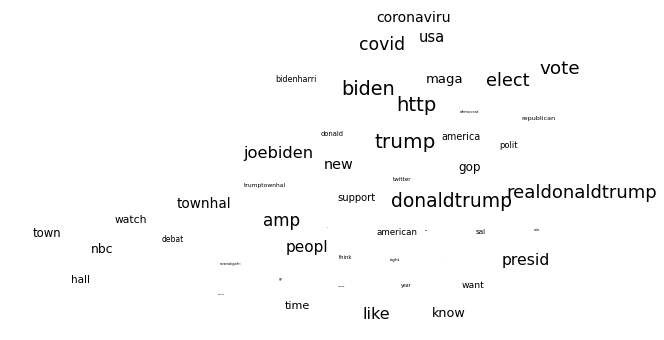

In [296]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(tsneWords[:, 0], tsneWords[:, 1], alpha = 0)#Making the points invisible 
for i, word in enumerate(targetWords):
    ax.annotate(word, (tsneWords[:, 0][i],tsneWords[:, 1][i]), size =  20 * (numWords - i) / numWords)
plt.xticks(())
plt.yticks(())
plt.show()

In [131]:
### This is a trial for using google news to train the model and to see whether there is any difference compared with
#### the tutorial material
model_address = "GoogleNews-vectors-negative300.bin" 
nytimes_w2v_model = gensim.models.KeyedVectors.load_word2vec_format(model_address, binary = True)

In [132]:
nytimes_w2v_model.most_similar("vote")

[('votes', 0.7676140666007996),
 ('voting', 0.7273974418640137),
 ('voted', 0.6484754681587219),
 ('cast_ballots', 0.6461232900619507),
 ('ballot', 0.6215823888778687),
 ('referendum', 0.61916583776474),
 ('election', 0.6026721000671387),
 ('voters', 0.584191620349884),
 ('revote', 0.5787466168403625),
 ('precincts_reporting_Landrieu', 0.5786216259002686)]

In [59]:
w2vmodel_cleaned.wv.most_similar(positive = ['blm', 'biden'], negative = ['trump']) 

[('alwx', 0.9474133849143982),
 ('gawx', 0.9448561668395996),
 ('berni', 0.9130119681358337),
 ('trumprallyia', 0.903968870639801),
 ('bidenharri', 0.8882061243057251),
 ('desmoin', 0.887766420841217),
 ('voteblu', 0.8830728530883789),
 ('repost', 0.8799728751182556),
 ('dumptrump', 0.8799450397491455),
 ('negligenthomicid', 0.870005190372467)]

In [60]:
import matplotlib.pyplot as plt

In [61]:
numWords = 50

In [65]:
targetWords = w2vmodel_cleaned.wv.index_to_key[200: 200 + numWords]

In [67]:
wordsSubMatrix = []
for word in targetWords:
    wordsSubMatrix.append(w2vmodel_cleaned.wv[word])
wordsSubMatrix = np.array(wordsSubMatrix)
wordsSubMatrix

array([[-0.2535013 ,  0.52372235,  0.25637066, ..., -0.33771652,
         0.48539466, -0.23205605],
       [-0.36580595,  0.61580914,  0.23534124, ..., -0.4686984 ,
         0.65367603, -0.29439616],
       [-0.354717  ,  0.5397639 ,  0.1426834 , ..., -0.46137443,
         0.5978405 , -0.25869498],
       ...,
       [-0.2544637 ,  0.4809597 ,  0.2410562 , ..., -0.32027888,
         0.47215888, -0.18795906],
       [-0.3817886 ,  0.8395193 ,  0.30774465, ..., -0.5157525 ,
         0.7555695 , -0.28907502],
       [-0.27167112,  0.50061107,  0.19400686, ..., -0.36481145,
         0.5159542 , -0.22360723]], dtype=float32)

In [68]:
import sklearn.decomposition
import sklearn.manifold

In [69]:
pcaWords = sklearn.decomposition.PCA(n_components = 50).fit(wordsSubMatrix)
reducedPCA_data = pcaWords.transform(wordsSubMatrix)
#T-SNE is theoretically better, but you should experiment
tsneWords = sklearn.manifold.TSNE(n_components = 2).fit_transform(reducedPCA_data)

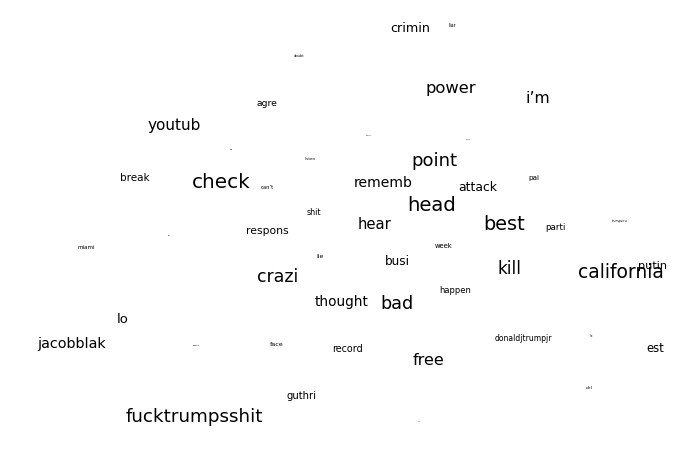

In [70]:
fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(tsneWords[:, 0], tsneWords[:, 1], alpha = 0)#Making the points invisible 
for i, word in enumerate(targetWords):
    ax.annotate(word, (tsneWords[:, 0][i],tsneWords[:, 1][i]), size =  20 * (numWords - i) / numWords)
plt.xticks(())
plt.yticks(())
plt.show()

4a) Use the spaCy language model's Computational Linguistics functions to explore 20 sentences in your documents from the corpora.

In [298]:
from spacy import displacy

In [ ]:
POS-Tagging

In [305]:
corpus[:20]

["#Trump: As a student I used to hear for years, for ten years, I heard China! In 2019! And we have 1.5 and they don't know how many we have and I asked them how many do we have and they said 'sir we don't know.' But we have millions. Like 300 million.\n\nUm. What?",
 'You get a tie! And you get a tie! #Trump ‘s rally #Iowa https://t.co/jJalUUmh5D',
 'In 2020, #NYPost is being #censorship #CENSORED by Twitter to manipulate a US election in favor of #JoeBiden and against #Trump.\n\nbut CCP from #China or porn on Twitter? \n\nThat’s always been fine for @jack @vijaya @dickc @KatieS.\n\n@marciadorsey is @jack sick?',
 '#Trump #PresidentTrump #Trump2020LandslideVictory #Trump2020 #MAGA #KAG #4MoreYears #America #AmericaFirst #AllLivesMatter #Winning #Vote #VoteInPerson #VoteTrump #VotePresidentTrump https://t.co/TzXBKOvgNs',
 '@Susan_Hutch @JoeBiden #Ukraine @RealDonaldTrump impeachment #FactCheck ‘how’ often #Trump &amp; @GOP lied!!!\n\nhttps://t.co/OFbVPBQs1s',
 '#Ukraine @RealDonaldTrum

In [306]:
for st in corpus[:20]:
    doc = nlp(st)
    for token in doc:
        print(token.text, token.pos_, token.tag_)

# NOUN NNS
Trump PROPN NNP
: PUNCT :
As ADP IN
a DET DT
student NOUN NN
I PRON PRP
used VERB VBD
to PART TO
hear VERB VB
for ADP IN
years NOUN NNS
, PUNCT ,
for ADP IN
ten NUM CD
years NOUN NNS
, PUNCT ,
I PRON PRP
heard VERB VBD
China PROPN NNP
! PUNCT .
In ADP IN
2019 NUM CD
! PUNCT .
And CCONJ CC
we PRON PRP
have VERB VBP
1.5 NUM CD
and CCONJ CC
they PRON PRP
do AUX VBP
n't PART RB
know VERB VB
how SCONJ WRB
many ADJ JJ
we PRON PRP
have VERB VBP
and CCONJ CC
I PRON PRP
asked VERB VBD
them PRON PRP
how SCONJ WRB
many ADJ JJ
do AUX VBP
we PRON PRP
have VERB VB
and CCONJ CC
they PRON PRP
said VERB VBD
' PUNCT ``
sir NOUN NN
we PRON PRP
do AUX VBP
n't PART RB
know VERB VB
. PUNCT .
' PUNCT ''
But CCONJ CC
we PRON PRP
have VERB VBP
millions NOUN NNS
. PUNCT .
Like INTJ UH
300 NUM CD
million NUM CD
. PUNCT .


 SPACE _SP
Um INTJ UH
. PUNCT .
What PRON WP
? PUNCT .
You PRON PRP
get VERB VBP
a DET DT
tie NOUN NN
! PUNCT .
And CCONJ CC
you PRON PRP
get VERB VBP
a DET DT
tie NOUN NN
! PUNCT .

In [308]:
for st in corpus[:20]:
    doc = nlp(st)
    for token in doc:
        print(token.text, token.ent_type_)

# 
Trump 
: 
As 
a 
student 
I 
used 
to 
hear 
for 
years DATE
, 
for 
ten DATE
years DATE
, 
I 
heard 
China GPE
! 
In 
2019 DATE
! 
And 
we 
have 
1.5 CARDINAL
and 
they 
do 
n't 
know 
how 
many 
we 
have 
and 
I 
asked 
them 
how 
many 
do 
we 
have 
and 
they 
said 
' 
sir 
we 
do 
n't 
know 
. 
' 
But 
we 
have 
millions CARDINAL
. 
Like CARDINAL
300 CARDINAL
million CARDINAL
. 


 
Um 
. 
What 
? 
You 
get 
a 
tie 
! 
And 
you 
get 
a 
tie 
! 
# CARDINAL
Trump 
‘s 
rally 
# 
Iowa GPE
https://t.co/jJalUUmh5D ORG
In 
2020 DATE
, 
# 
NYPost 
is 
being 
# 
censorship 
# 
CENSORED 
by 
Twitter PRODUCT
to 
manipulate 
a 
US GPE
election 
in 
favor 
of 
# 
JoeBiden MONEY
and 
against 
# 
Trump 
. 


 
but 
CCP ORG
from 
# 
China GPE
or 
porn 
on 
Twitter PRODUCT
? 


 
That 
’s 
always 
been 
fine 
for 
@jack ORG
@vijaya ORG
@dickc ORG
@KatieS. 


 
@marciadorsey 
is 
@jack ORG
sick 
? 
# MONEY
Trump MONEY
# MONEY
PresidentTrump MONEY
# MONEY
Trump2020LandslideVictory MONEY
# MONEY
Tr

In [310]:
for st in corpus[:20]:
    doc = nlp(st)
    for ent in doc.ents:
        print(ent.text, ent.label_)

years DATE
ten years DATE
China GPE
2019 DATE
1.5 CARDINAL
millions CARDINAL
Like 300 million CARDINAL
# CARDINAL
Iowa GPE
https://t.co/jJalUUmh5D ORG
2020 DATE
Twitter PRODUCT
US GPE
JoeBiden MONEY
CCP ORG
China GPE
Twitter PRODUCT
@jack @vijaya @dickc ORG
@jack ORG
#Trump #PresidentTrump #Trump2020LandslideVictory #Trump2020 MONEY
#MAGA MONEY
#KAG #4MoreYears #America # MONEY
#AllLivesMatter # MONEY
#Vote #VoteInPerson # MONEY
# ORG
Ukraine GPE
FactCheck ORG
# CARDINAL
Trump & ORG
Ukraine GPE
FactCheck ORG
# CARDINAL
Trump & ORG
# CARDINAL
Don PERSON
China GPE
#China #HunterBiden MONEY
#JoeBiden MONEY
#BidenHarris MONEY
#BidenHarris2020 #TrumpPence2020 #Trump # MONEY
#WTO MONEY
# CARDINAL
the balls &amp ORG
PennsylvaniaAvenue & ORG
1 CARDINAL
#BidenHarrisToSaveAmerica # MONEY
# CARDINAL
420 million dollars MONEY
# WORK_OF_ART
#TrumpTaxFraud PERCENT
@OMAROSA ORG
# CARDINAL
Donald PERSON
TheWeek MONEY
Penn PERSON
Obama GPE
Pennsylvania GPE
#Trump MONEY
#Obama #Clinton MONEY
Biden ORG
#

In [311]:
for st in corpus[:20]:
    doc = nlp(st)
    displacy.render(doc, style='ent', jupyter=True)

4b) How do you think such methods can be useful in your social scientific research? Hint: think of what different parts of speech or entities might entail!

Such methods can help me to identify persons that appear in each sentence so that I can visulize the interactions between users and the persons described in their comments/words; In addition, I could focus on the verb in every sentence to investigate the emotion or enegagement of speakers in the context. Furthermorem, the method could identify hashtags, product as well as org, which may be used for some collective actions in social media.